<a href="https://colab.research.google.com/github/dhruvjha206/Mech-Prop-using-ML/blob/main/Al6061_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **For Aluminium 6061 Alloy at 20°C**

In [7]:
# Importing Important Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas.testing as tm
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as slm

### Data Preparation

About the Data Set

The dataset is stress-strain ( Tensile and Microindentation ) of Aluminium 6061 Alloy under uniaxial and plain strain tension at 6 different temperatures.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#reading csv
path = "/content/drive/MyDrive/Al6061_20.csv"
df = pd.read_csv(path, encoding= 'unicode_escape')

Dataset

In [14]:
df

,Alloy_Name,Temp (°C),Strain,Stress_MPa,Specimen_Type
0,Al6061,20,-0.000011,0.598606,Uniaxial tension
1,Al6061,20,-0.000012,0.606464,Uniaxial tension
2,Al6061,20,-0.000014,0.612953,Uniaxial tension
3,Al6061,20,-0.000023,0.618383,Uniaxial tension
4,Al6061,20,-0.000040,0.731632,Uniaxial tension
...,...,...,...,...,...
207,Al6061,20,0.103016,279.749201,Uniaxial tension
208,Al6061,20,0.103487,278.960666,Uniaxial tension
209,Al6061,20,0.103955,278.155939,Uniaxial tension
210,Al6061,20,0.104425,277.249995,Uniaxial tension


Finding Missing Values in the Data Set

In [15]:
df.isnull().sum()

Alloy_Name       0
Temp (°C)        0
Strain           0
Stress_MPa       0
Specimen_Type    0
dtype: int64

In [16]:
df = df.drop([df.index[211]])
df

,Alloy_Name,Temp (°C),Strain,Stress_MPa,Specimen_Type
0,Al6061,20,-0.000011,0.598606,Uniaxial tension
1,Al6061,20,-0.000012,0.606464,Uniaxial tension
2,Al6061,20,-0.000014,0.612953,Uniaxial tension
3,Al6061,20,-0.000023,0.618383,Uniaxial tension
4,Al6061,20,-0.000040,0.731632,Uniaxial tension
...,...,...,...,...,...
206,Al6061,20,0.102075,281.491897,Uniaxial tension
207,Al6061,20,0.103016,279.749201,Uniaxial tension
208,Al6061,20,0.103487,278.960666,Uniaxial tension
209,Al6061,20,0.103955,278.155939,Uniaxial tension


Let's Do Some Exploratory Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alloy_Name     211 non-null    object 
 1   Temp (°C)      211 non-null    int64  
 2   Strain         211 non-null    float64
 3   Stress_MPa     211 non-null    float64
 4   Specimen_Type  211 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 9.9+ KB


In [18]:
df.describe()

,Temp (°C),Strain,Stress_MPa
count,211.0,211.000000,211.000000
mean,20.0,0.042778,248.772842
std,0.0,0.032092,77.334915
min,20.0,-0.000066,0.598606
25%,20.0,0.013195,265.686624
50%,20.0,0.040571,279.492681
75%,20.0,0.069089,287.882812
max,20.0,0.104425,291.821443


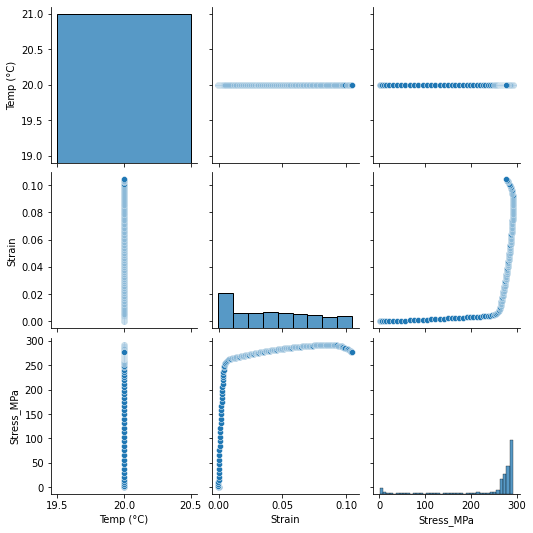

In [ ]:
sn.pairplot(data=df)

Data Plotting (Stress-strain curve)

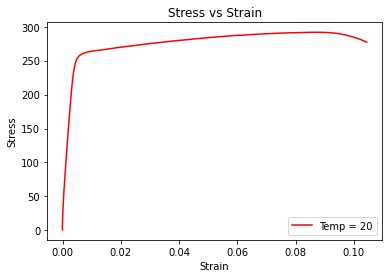

In [ ]:
plt.plot(df["Strain"], df["Stress_MPa"], color='r', label = 'Temp = 20')
plt.title("Stress vs Strain")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.legend()
plt.show()

In [ ]:
row = df.shape[0]
col = df.shape[1]

For finding **PROPORTIONAL LIMIT**, we need to find **Linear Regression line** with **minimum 95% accuracy**:

In [ ]:
# Plotting multiple Regression lines and finding their accuracy 
import random
prop_lim = random.randint(0,row)

for i in range(2, row):
  #Change to DataFrame 
  x = pd.DataFrame(df.loc[0:i , ['Strain']])
  y = pd.DataFrame(df.loc[0:i , ['Stress_MPa']])

  model = LinearRegression().fit(x, y)
  y_new = model.predict(x)

  acc = round(slm.r2_score(y, y_new), 2)
  if acc >= 0.95 :
    prop_lim = i
prop_lim   

41

In [ ]:
x1 = df.loc[[prop_lim-2]].Strain
y1 = df.iloc[[prop_lim-2]].Stress_MPa

### Building Regression model

In [ ]:
x = pd.DataFrame(df.loc[0:prop_lim , ['Strain']])
y = pd.DataFrame(df.loc[0:prop_lim , ['Stress_MPa']])

model = LinearRegression().fit(x, y)
y_new = model.predict(x)

Plotting Regression line and Proportional limit

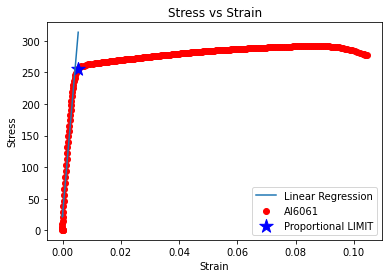

In [ ]:
plt.scatter(df["Strain"], df["Stress_MPa"], color='r', label = 'Al6061')
plt.plot(x, y_new, label='Linear Regression' )
plt.scatter(x1,y1,color='b',marker='*',s=200, label = 'Proportional LIMIT')
plt.title("Stress vs Strain")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.legend()
plt.show()

In [ ]:
# For Fracture Point
x4 = df.loc[[row-2]].Strain
y4 = df.loc[[row-2]].Stress_MPa

For the ultimate tensile strength:

In [ ]:
max_Stress = df.iloc[df['Stress_MPa'].idxmax()]
x3 = max_Stress['Strain']
y3 = max_Stress['Stress_MPa']

Finding Yield Point using offset method

In [ ]:
#Taking 0.2% as offset
df["Offset"] = df["Strain"] + 0.002
df

,Alloy_Name,Temp (°C),Strain,Stress_MPa,Specimen_Type,Offset
0,Al6061,20,-0.000011,0.598606,Uniaxial tension,0.001989
1,Al6061,20,-0.000012,0.606464,Uniaxial tension,0.001988
2,Al6061,20,-0.000014,0.612953,Uniaxial tension,0.001986
3,Al6061,20,-0.000023,0.618383,Uniaxial tension,0.001977
4,Al6061,20,-0.000040,0.731632,Uniaxial tension,0.001960
...,...,...,...,...,...,...
206,Al6061,20,0.102075,281.491897,Uniaxial tension,0.104075
207,Al6061,20,0.103016,279.749201,Uniaxial tension,0.105016
208,Al6061,20,0.103487,278.960666,Uniaxial tension,0.105487
209,Al6061,20,0.103955,278.155939,Uniaxial tension,0.105955


Building regression model for Yield Strength

In [ ]:
x = pd.DataFrame(df.loc[0:prop_lim , ['Strain']])
y = pd.DataFrame(df.loc[0:prop_lim , ['Stress_MPa']])

model = LinearRegression().fit(x, y)
y_new = model.predict(x)

xx = pd.DataFrame(df.loc[0:prop_lim, ['Offset']])
yy = pd.DataFrame(df.loc[0:prop_lim, ['Stress_MPa']])

model = LinearRegression().fit(xx, yy)
yy_new = model.predict(xx)

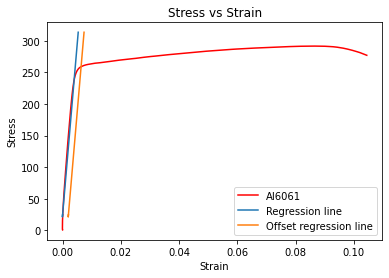

In [ ]:
plt.plot(df["Strain"], df["Stress_MPa"], color='r', label = 'Al6061')
plt.plot(x, y_new, label='Regression line' )
plt.plot(xx, yy_new, label='Offset regression line' )
plt.title("Stress vs Strain")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.legend()
plt.show()

Finding the yield point:

In [ ]:
for i in range (5, row):
  if(df.iloc[prop_lim]['Offset'] <= df.iloc[i]['Strain']) :
    x2 = df.loc[i-2].Strain
    y2 = df.loc[i-2].Stress_MPa
    break

### **Concluded PLOT**

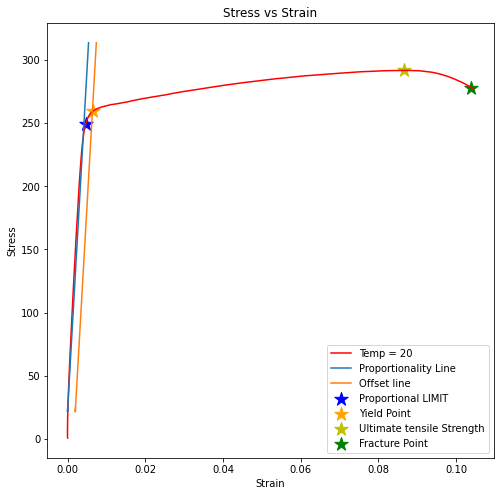

In [ ]:
plt.subplots(figsize=[8,8])
plt.plot(df["Strain"], df["Stress_MPa"], color='r', label = 'Temp = 20')
plt.scatter(x1,y1,color='b',marker='*',s=200, label = 'Proportional LIMIT')
plt.scatter(x2,y2,color='orange',marker='*',s=200, label = 'Yield Point')
plt.scatter(x3,y3,color='y',marker='*',s=200, label = 'Ultimate tensile Strength')
plt.scatter(x4,y4,color='g',marker='*',s=200, label = 'Fracture Point')
plt.plot(x, y_new, label='Proportionality Line')
plt.plot(xx, yy_new, label='Offset line' )
plt.title("Stress vs Strain")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.legend()
plt.show()

**Results for Al6061 at 20°C:**

In [ ]:
print('Proportional limit :' ,df.iloc[prop_lim]['Stress_MPa'] ,'MPa')
print('Yield Point :' ,df.iloc[i]['Stress_MPa'] ,'MPa')
print('Ultimate tensile strength :' , y3 ,'MPa')
print('Fracture point :' ,df.iloc[row-1]['Stress_MPa'] ,'MPa')

Proportional limit : 255.4674444 MPa
Yield Point : 264.9347035 MPa
Ultimate tensile strength : 291.8214433 MPa
Fracture point : 277.24999460000004 MPa


Model Accuracy:

In [ ]:
# Regression score function
print(slm.r2_score(y, y_new))

0.9566099771631561
